# <font color=blue>Assignments for "Feature Engineering - Part 1"</font>

In this assignment, you will continue to study the data of the `US Education System` ([dataset](https://www.kaggle.com/spscientist/students-performance-in-exams/home)). In this dataset, there is a lot of data on an annual basis. You can reach the explanations of this data from Kaggle again.

To complete this assignment, submit the Github link of the Jupyter notebook file containing solutions to the questions below. You can talk to your mentor on your head or ask Slack at office time.

**(1)** Are the exam scores (math, reading, writing) normally distributed? If not, what can we do to have a normal distribution?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sci
import warnings

warnings.filterwarnings("ignore")

In [2]:
edu = pd.read_csv(r"C:\Users\Kleerys\Desktop\Career\1.1-Python\1.1-DataSets\StudentsPerformance.csv")

In [3]:
display(edu.head())

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


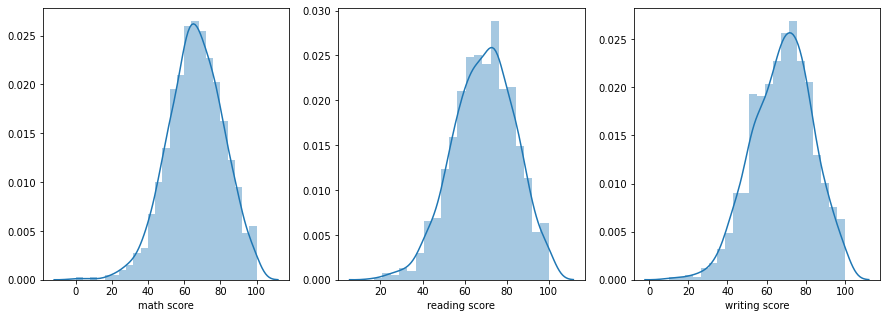

In [4]:
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
sns.distplot(edu["math score"])
plt.subplot(1,3,2)
sns.distplot(edu["reading score"])
plt.subplot(1,3,3)
sns.distplot(edu["writing score"])
plt.show()

***All distributions negative skewed.***

***We can drop the far values from the mean or winsorize them. But winsorizing them might not help us to get a normal distribution.***

**(2)** We want to keep the three exam results in one variable, as the target variable. To do this, define a new variable containing the average of the three exams. Test whether the average of this new variable is normally distributed. If it does not have a normal distribution, try to make it normally distributed by transforming and test the result of the transformation.

In [5]:
edu["general score mean"] = (edu["math score"] + edu["reading score"] + edu["writing score"]) / 3

In [6]:
display(edu.head())

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,general score mean
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


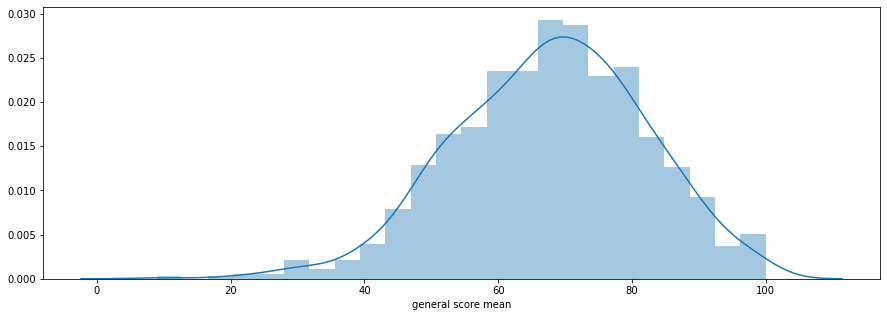

In [7]:
plt.figure(figsize = (15,5))
sns.distplot(edu["general score mean"])
plt.show()

In [8]:
edu["general score mean"].describe()

count    1000.000000
mean       67.770667
std        14.257326
min         9.000000
25%        58.333333
50%        68.333333
75%        77.666667
max       100.000000
Name: general score mean, dtype: float64

In [9]:
mean = 67.770667
limitUp = 100
limitDown = mean - (limitUp - mean)
tolorate = limitUp - mean

In [10]:
dropList = []
for index in edu.index:
    if edu["general score mean"].iloc[index] < limitDown:
        dropList.append(index)

In [11]:
print(dropList)

[17, 59, 76, 91, 145, 211, 327, 338, 363, 466, 555, 596, 601, 787, 842, 895, 896, 980]


In [12]:
edu.drop(dropList, inplace = True)
edu.reset_index(drop = True, inplace = True)

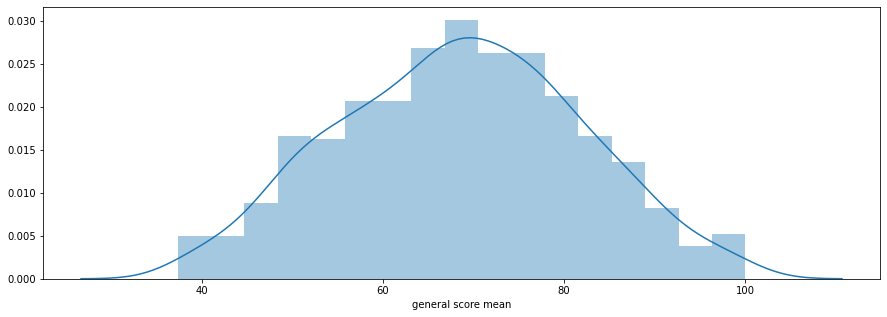

In [13]:
plt.figure(figsize = (15,5))
sns.distplot(edu["general score mean"])
plt.show()

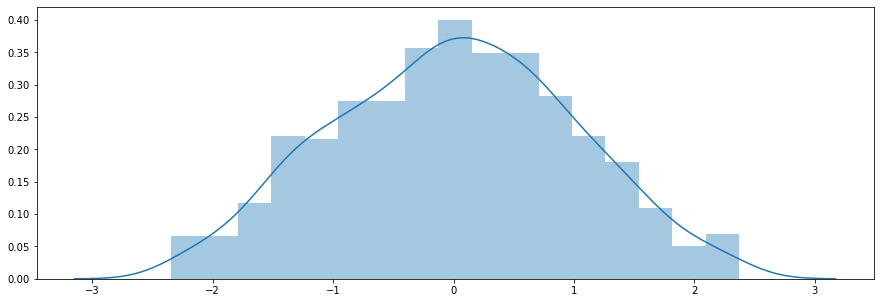

In [14]:
z = sci.stats.mstats.zscore(edu["general score mean"])
plt.figure(figsize = (15,5))
sns.distplot(z)
plt.show()

**(3)** Which variables seem to be related to the target variable we created in the previous question? If our goal was to explain the factors that determine the success of the exam, which variables should we keep in our data set?

In [15]:
edu.corr()
edu["luncPay"] = pd.get_dummies(edu["lunch"], drop_first = True)
edu.drop("lunch", axis = 1, inplace = True)

In [16]:
display(edu.head())

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score,general score mean,luncPay
0,female,group B,bachelor's degree,none,72,72,74,72.666667,1
1,female,group C,some college,completed,69,90,88,82.333333,1
2,female,group B,master's degree,none,90,95,93,92.666667,1
3,male,group A,associate's degree,none,47,57,44,49.333333,0
4,male,group C,some college,none,76,78,75,76.333333,1


In [21]:
edu["getTestPrep"] = pd.get_dummies(edu["test preparation course"], drop_first = False)["completed"]
edu.drop("test preparation course", axis = 1, inplace = True)

In [22]:
display(edu.head())

,gender,race/ethnicity,parental level of education,math score,reading score,writing score,general score mean,luncPay,getTestPrep
0,female,group B,bachelor's degree,72,72,74,72.666667,1,0
1,female,group C,some college,69,90,88,82.333333,1,1
2,female,group B,master's degree,90,95,93,92.666667,1,0
3,male,group A,associate's degree,47,57,44,49.333333,0,0
4,male,group C,some college,76,78,75,76.333333,1,0


In [23]:
edu.corr()

,math score,reading score,writing score,general score mean,luncPay,getTestPrep
math score,1.000000,0.793516,0.775233,0.906761,0.329250,0.159022
reading score,0.793516,1.000000,0.948805,0.966836,0.197862,0.226037
writing score,0.775233,0.948805,1.000000,0.961021,0.215210,0.303716
general score mean,0.906761,0.966836,0.961021,1.000000,0.262332,0.243292
luncPay,0.329250,0.197862,0.215210,0.262332,1.000000,-0.028456
getTestPrep,0.159022,0.226037,0.303716,0.243292,-0.028456,1.000000


***As expected, all the scores affects general score mean significantly but luch and prep course don't affect that much. Nonetheless i will never give up any value and use all these features.***

**(4)** Does the test preparation course have an impact on the target variable you created?

***Answered above.(Not much)***